In [ ]:
# Amostragem Simples
import pandas as pd
import numpy as np

ARQ = '../data/raw/iris.csv'

df = pd.read_csv(ARQ)
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.shape

(150, 5)

In [16]:
np.random.seed(2345)
# 150 amostras, de 0 a 1, com reposição probabilidades equivalentes
amostra = np.random.choice(a=[0, 1], size=150, replace=True, p=[0.7, 0.3])

# len(amostra)
# len(amostra[amostra == 1])
# len(amostra[amostra == 0])
amostra

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [17]:
df_final = df.loc[amostra == 0]
df_final.shape

(101, 5)

In [18]:
df_final2 = df.loc[amostra == 1]
df_final2.shape

(49, 5)

In [20]:
# Amostragem Sistemática
import pandas as pd
import numpy as np
from math import ceil

In [21]:
populacao = 150
amostra = 15
k = ceil(populacao / amostra)
print(k)

10


In [28]:
# Definindo o ponto de partida aleatório
r = np.random.randint(low = 1, high = k + 1, size = 1)
print(r)

[9]


In [29]:
# Usando um for para somar os próximos valores, baseado no primeiro valor r
acumulador = int(r[0])
sorteados = []
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k
print(sorteados)

[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149]


In [30]:
df_final_sistematica = df.loc[sorteados]
df_final_sistematica

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [32]:
# Amostra Estratificada
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [34]:
# df.iloc[:, 0:4]  # todas as linhas, colunas 0 a 3
# df.iloc[:, 4]    # todas as linhas, coluna 4
# test_size = 0.5  # 50% da base para teste e por isso colocamos "_" para os outros valores
# stratify = df.iloc[:, 4]  # estratificação pela coluna 4 (class)

X, _ , y, _ = train_test_split(df.iloc[:, 0:4], df.iloc[:, 4], test_size=0.5, stratify=df.iloc[:, 4])
y.value_counts()

class
Iris-setosa        25
Iris-versicolor    25
Iris-virginica     25
Name: count, dtype: int64

In [35]:
ARQ2 = '../data/raw/infert.csv'
df2 = pd.read_csv(ARQ2)
df2

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [36]:
df2['education'].value_counts()

education
6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: count, dtype: int64

In [37]:
# Criando uma amostra com somente 40% dos registros (por isso é definido 0.6, pois 1 - 0.4 = 0.6)
X1, _ , y1, _ = train_test_split(df2.iloc[:, 2:9], df2.iloc[:, 1], test_size=0.6, stratify=df2.iloc[:, 1])
y1.value_counts()

education
6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: count, dtype: int64

In [50]:
# Medidas de Centralidade e Variabilidade
# scipy para estatísticas mais detallhadas
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000] # salários anuais em R$
np.mean(jogadores)

181111


In [40]:
np.median(jogadores)

np.float64(40000.0)

In [41]:
# Gerando os quartis
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [44]:
# Visualizando o desvio padrão
np.std(jogadores, ddof=1) # ddof=1 para amostra

np.float64(255307.87514511007)

In [53]:
stats.describe(jogadores)

DescribeResult(nobs=np.int64(9), minmax=(np.int64(12000), np.int64(800000)), mean=np.float64(181111.11111111112), variance=np.float64(65182111111.11111), skewness=np.float64(1.758635899846188), kurtosis=np.float64(1.9572075427527729))

In [51]:
s_jogadores = pd.Series(jogadores)
s_jogadores.describe()

count         9.000000
mean     181111.111111
std      255307.875145
min       12000.000000
25%       30000.000000
50%       40000.000000
75%      250000.000000
max      800000.000000
dtype: float64

In [57]:
# Distribuição Normal
from scipy.stats import norm

In [58]:
# Conjunto de objetos em uma cesta, a média é 8 e o desvio padrão é 2
#  Qual a probabilidade de tirar um objeto que o peso é menor que 6 quilos?
norm.cdf(6, 8, 2)

np.float64(0.15865525393145707)

In [63]:
# Qual a probabilidade de tirar um objeto que o peso é maior que 6 quilos?
1 - norm.cdf(6, 8, 2)
# norm.sf(6, 8, 2)

np.float64(0.8413447460685429)

In [64]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 ou maior que 10 quilos?
norm.cdf(6, 8, 2) + norm.sf(10, 8, 2)

np.float64(0.31731050786291415)

In [65]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 10 e maior que 8 quilos?
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

np.float64(0.3413447460685429)

In [76]:
# Teste de distribuição normal
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skewnorm

In [69]:
# Criando dados em uma distribuição normal
dados = norm.rvs(size=1000)
dados

array([ 1.81955005e-01, -1.29738298e-01, -8.90344512e-01,  7.65034699e-01,
        1.68367861e+00, -4.00696691e-01,  1.29379605e-01,  5.75398150e-01,
        4.49769516e-01,  2.04213385e+00,  8.73361521e-01,  8.67818245e-01,
       -1.36167664e+00, -6.94312973e-01,  2.09450223e-02, -4.54739088e-01,
        1.15680615e-01,  3.43586620e-01, -1.11882034e-01,  2.40744881e+00,
        6.59176098e-01,  1.80341357e+00, -9.56012994e-02,  1.05690350e+00,
        1.03136955e-01,  8.61328808e-01,  1.78548367e+00,  2.00073285e-01,
        1.41769941e+00, -2.22085635e-01,  4.66518020e-01,  1.10276315e+00,
       -1.31202073e+00,  7.47016570e-01, -1.73367293e+00,  5.82553180e-02,
       -4.57518970e-01, -8.94741946e-01, -7.31710459e-01, -7.55731386e-02,
        2.18587792e+00, -1.03008922e+00, -1.09746350e+00, -9.24019559e-01,
        6.92594430e-01, -3.25354318e+00,  8.72118875e-01,  1.93033707e+00,
       -1.70544882e+00, -9.70060326e-01, -1.27251808e+00, -1.53190927e+00,
       -1.12212291e+00,  

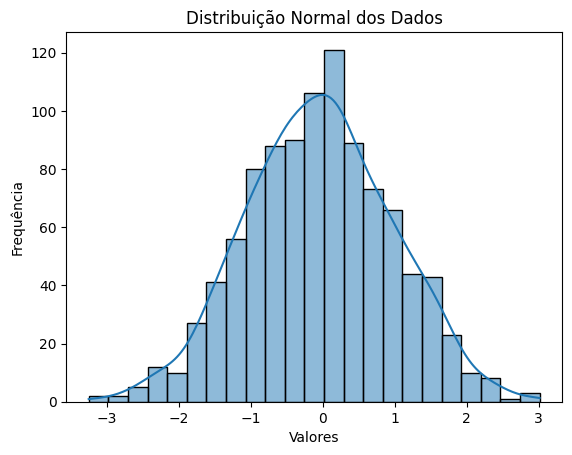

In [71]:
sns.histplot(dados, kde=True)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição Normal dos Dados')
plt.show()

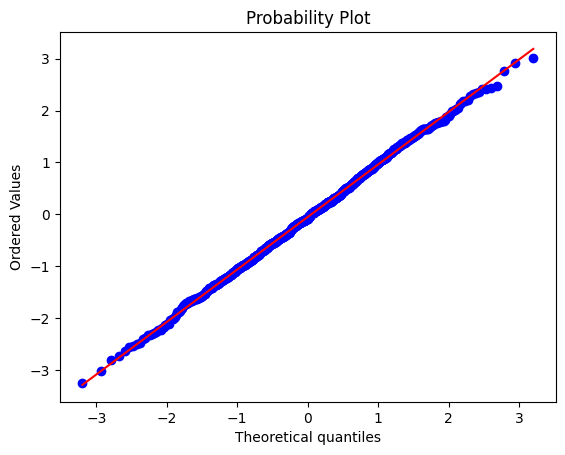

In [73]:
fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax)
plt.show()

In [74]:
# Execução do teste de Shapiro-Wilk
stats.shapiro(dados)

ShapiroResult(statistic=np.float64(0.9990354923844912), pvalue=np.float64(0.8908340350048625))

In [87]:
# Criando dados em uma distribuição não normal
dados2 = skewnorm.rvs(4, size=1000)
dados2

array([ 1.42621778e+00,  7.08069771e-01,  2.04087498e-01, -2.89138736e-01,
        2.11087868e-01,  2.70250905e+00,  1.77689609e+00,  9.37398059e-01,
        2.53225814e-03,  9.72286216e-01,  1.31175960e+00,  1.13301406e+00,
        3.46925669e-01,  6.84846207e-01,  1.11143743e+00,  7.92410464e-01,
       -3.44836670e-01,  1.26571131e+00,  6.86522631e-01,  1.92677743e-01,
        1.13301877e-01,  4.55215689e-01,  7.35823240e-01,  3.21202001e-01,
        2.70506481e-01,  2.20651160e-01,  6.67003278e-02,  7.99517596e-02,
        1.17909494e+00,  1.73289376e-01,  7.60597093e-01,  2.03032136e-01,
        6.95045399e-01,  2.40162916e+00,  3.38117127e-01,  7.91074323e-01,
        1.65683165e+00,  4.51779245e-01, -7.11638619e-03,  3.85050533e-01,
        5.39249924e-01,  7.97370410e-01, -2.89166805e-02,  1.43927922e+00,
        7.63132328e-01,  2.13373032e+00,  6.39112836e-01,  6.09427345e-01,
        2.69405269e-01,  3.90633034e-01,  9.89348846e-01,  6.73447628e-01,
        2.41509140e-01,  

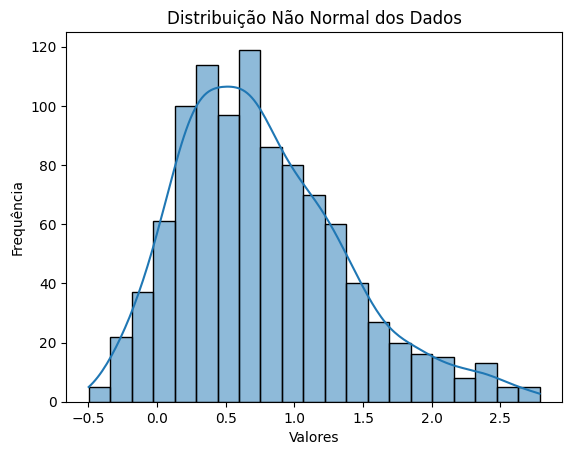

In [88]:
sns.histplot(dados2, kde=True)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição Não Normal dos Dados')
plt.show()

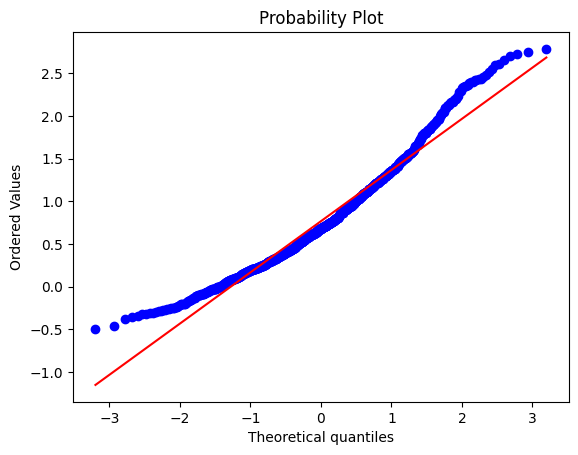

In [89]:
fig, ax = plt.subplots()
stats.probplot(dados2, fit=True, plot=ax)
plt.show()

In [90]:
stats.shapiro(dados2)

ShapiroResult(statistic=np.float64(0.9645989365672661), pvalue=np.float64(7.28461461583311e-15))